## Import Libraries

In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

## Loading Dataset

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
df.shape

(150, 5)

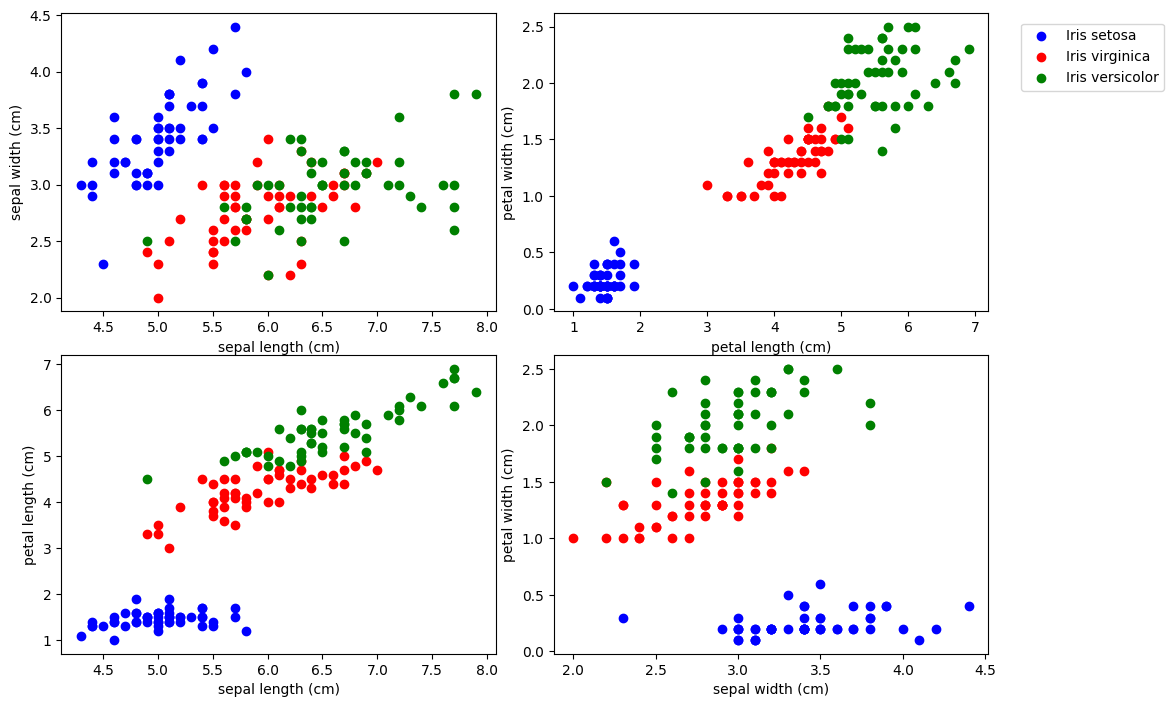

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

## Classic Train Test Split

In [5]:
features = df.drop('target',axis=1).values
labels = df['target'].values

In [6]:
train_X, test_X, train_y, test_y = train_test_split(
    features,
    labels, 
    test_size=0.2,
    random_state=33
)

### Converting to Tensors

In [7]:
X_train = torch.FloatTensor(train_X)
X_test = torch.FloatTensor(test_X)
y_train = torch.LongTensor(train_y).reshape(-1, 1)
y_test = torch.LongTensor(test_y).reshape(-1, 1)

## PyTorch Built-in Utilities

In [8]:
data = df.drop('target',axis=1).values
labels = df['target'].values

In [9]:
iris = TensorDataset(torch.FloatTensor(data), torch.LongTensor(labels))

In [10]:
type(iris)

torch.utils.data.dataset.TensorDataset

In [11]:
len(iris)

150

In [12]:
for i in iris:
    print(i)

(tensor([5.1000, 3.5000, 1.4000, 0.2000]), tensor(0))
(tensor([4.9000, 3.0000, 1.4000, 0.2000]), tensor(0))
(tensor([4.7000, 3.2000, 1.3000, 0.2000]), tensor(0))
(tensor([4.6000, 3.1000, 1.5000, 0.2000]), tensor(0))
(tensor([5.0000, 3.6000, 1.4000, 0.2000]), tensor(0))
(tensor([5.4000, 3.9000, 1.7000, 0.4000]), tensor(0))
(tensor([4.6000, 3.4000, 1.4000, 0.3000]), tensor(0))
(tensor([5.0000, 3.4000, 1.5000, 0.2000]), tensor(0))
(tensor([4.4000, 2.9000, 1.4000, 0.2000]), tensor(0))
(tensor([4.9000, 3.1000, 1.5000, 0.1000]), tensor(0))
(tensor([5.4000, 3.7000, 1.5000, 0.2000]), tensor(0))
(tensor([4.8000, 3.4000, 1.6000, 0.2000]), tensor(0))
(tensor([4.8000, 3.0000, 1.4000, 0.1000]), tensor(0))
(tensor([4.3000, 3.0000, 1.1000, 0.1000]), tensor(0))
(tensor([5.8000, 4.0000, 1.2000, 0.2000]), tensor(0))
(tensor([5.7000, 4.4000, 1.5000, 0.4000]), tensor(0))
(tensor([5.4000, 3.9000, 1.3000, 0.4000]), tensor(0))
(tensor([5.1000, 3.5000, 1.4000, 0.3000]), tensor(0))
(tensor([5.7000, 3.8000, 1.7

### Data Loader

DataLoader is a powerful tool for efficiently loading and processing data for training deep learning models. It provides functionalities for batching, shuffling, and processing data, making it easier to work with large datasets.

In [13]:
iris_loader = DataLoader(dataset=iris, batch_size=50, shuffle=True)

In [14]:
for i_batch, sample_batched in enumerate(iris_loader):
    print(i_batch, sample_batched)

0 [tensor([[5.1000, 2.5000, 3.0000, 1.1000],
        [5.3000, 3.7000, 1.5000, 0.2000],
        [4.4000, 3.0000, 1.3000, 0.2000],
        [5.0000, 3.4000, 1.6000, 0.4000],
        [5.5000, 3.5000, 1.3000, 0.2000],
        [6.0000, 3.4000, 4.5000, 1.6000],
        [6.4000, 2.7000, 5.3000, 1.9000],
        [6.1000, 2.9000, 4.7000, 1.4000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [5.7000, 3.0000, 4.2000, 1.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [6.6000, 3.0000, 4.4000, 1.4000],
        [6.0000, 2.2000, 5.0000, 1.5000],
        [5.5000, 2.3000, 4.0000, 1.3000],
        [6.9000, 3.2000, 5.7000, 2.3000],
        [5.5000, 2.4000, 3.8000, 1.1000],
        [5.2000, 3.4000, 1.4000, 0.2000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [6.2000, 2.2000, 4.5000, 1.5000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.5000, 2.4000, 3.7000, 1.0000],
        [6.4000, 2.9000, 4.3000, 1.3000],
        [5.1000, 3.4000, 1.5000, 0.2000],
        [6.1000, 2.8000, 4.7000